# Sklearn Binary

In [2]:
import pandas as pd
binaryDf = pd.read_csv('binary_dataset.csv')

In [3]:
X = binaryDf[['WHITE',
            'BLACK_OR_AFRICAN_AMERICAN',
            'AMERICAN_INDIAN_AND_ALASKA_NATIVE',
            'ASIAN',
            'NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER',
            'HISPANIC_OR_LATINO'
            ]]
y = binaryDf['GrowthRate']

In [4]:
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)
models = {}
accuracies = {}
trainingTimes = {}
predictionTimes = {}

In [5]:
def processModel(model, modelKey):
    # Train Model
    print('----- ----- -----')
    print('Training model', modelKey)
    trainingStartTime = time.time()
    trainedModel = model.fit(X_train, y_train)
    trainingTime = time.time() - trainingStartTime
    print('Finished training in ' + str(trainingTime) + 's')

    # Predict
    print('Predicting on model', modelKey)
    predictionStartTime = time.time()
    modelPredictions = trainedModel.predict(X_test)
    predictionTime = time.time() - predictionStartTime
    print('Finished predictions in ' + str(predictionTime) + 's')

    # Get Accuracy
    print('Getting accuracies on model', modelKey)
    accuracy = trainedModel.score(X_test, y_test)

    # Finished
    print()
    print('Finished processing model', modelKey)
    print('Accuracy: ' + str(accuracy))
    print('Training time: ' + str(trainingTime) + 's')
    print('Prediction time: ' + str(predictionTime) + 's')
    print('----- ----- -----')

    return (accuracy, trainingTime, predictionTime)

In [6]:
# Set Model Properties
model = 'SVM Linear Kernel'
from sklearn.svm import SVC
models[model] = SVC(kernel = 'linear', C = 1)
accuracies[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model SVM Linear Kernel
Finished training in 231.55755496025085s
Predicting on model SVM Linear Kernel
Finished predictions in 50.66634392738342s
Getting accuracies on model SVM Linear Kernel

Finished processing model SVM Linear Kernel
Accuracy: 0.8622945052133307
Training time: 231.55755496025085s
Prediction time: 50.66634392738342s
----- ----- -----


In [7]:
# Set Model Properties
model = 'Decision Tree Classifier'
from sklearn.tree import DecisionTreeClassifier
models[model] = DecisionTreeClassifier(max_depth = 2)
accuracies[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Decision Tree Classifier
Finished training in 0.047998905181884766s
Predicting on model Decision Tree Classifier
Finished predictions in 0.003724813461303711s
Getting accuracies on model Decision Tree Classifier

Finished processing model Decision Tree Classifier
Accuracy: 0.8622945052133307
Training time: 0.047998905181884766s
Prediction time: 0.003724813461303711s
----- ----- -----


In [8]:
# Set Model Properties
model = 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
models[model] = LogisticRegression()
accuracies[model], trainingTimes[model], predictionTimes[model] = processModel(models[model], model)

----- ----- -----
Training model Logistic Regression
Finished training in 0.19045019149780273s
Predicting on model Logistic Regression
Finished predictions in 0.0034699440002441406s
Getting accuracies on model Logistic Regression

Finished processing model Logistic Regression
Accuracy: 0.8622945052133307
Training time: 0.19045019149780273s
Prediction time: 0.0034699440002441406s
----- ----- -----


In [9]:
resultsDf = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'TrainingTime', 'PredictionTime'])
resultsDf['Accuracy'] = accuracies.values()
resultsDf['TrainingTime'] = trainingTimes.values()
resultsDf['PredictionTime'] = predictionTimes.values()

resultsDf

,Accuracy,TrainingTime,PredictionTime
SVM Linear Kernel,0.862295,231.557555,50.666344
Decision Tree Classifier,0.862295,0.047999,0.003725
Logistic Regression,0.862295,0.190450,0.003470


In [14]:
resultsDf.to_csv('results_binary_sklearn.csv', index_label='model')

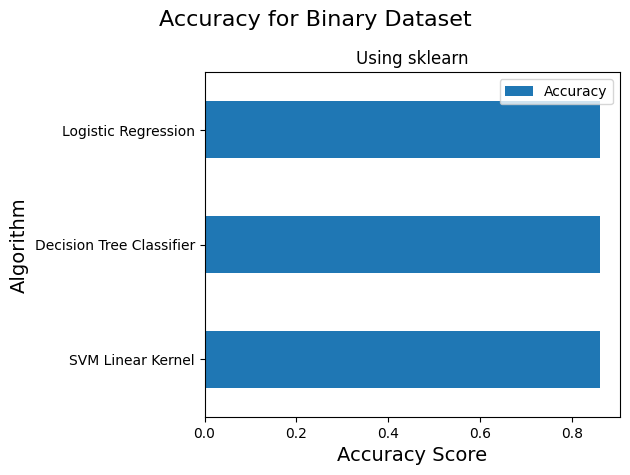

In [11]:
import matplotlib.pyplot as plt
toPlot = resultsDf.drop(['TrainingTime', 'PredictionTime'], axis=1)
toPlot = toPlot.sort_values('Accuracy', ascending=False)
ax = toPlot.plot.barh()
plt.title('Using sklearn', fontsize=12)
plt.suptitle('Accuracy for Binary Dataset', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.tight_layout()